# Partie invention des données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA

np.random.seed(32)

In [2]:
# Création des données pour la température.

temp_T = np.random.normal(3.5, 0.5, 8)
temp_T = np.clip(temp_T, a_min=0, a_max=None)

temp_C = np.random.normal(1, 1, 22)
temp_C = np.clip(temp_C, a_min=0, a_max=None)

In [3]:
# Création des données pour le rapport H/D

HD_T = np.random.normal(16, 5, 8) / np.random.normal(21.6, 2, 8)

HD_C = np.random.normal(16.2, 5, 22) / np.random.normal(19, 2, 22)

In [4]:
# Création des données pour les pigments

chl_T = np.random.normal(13.5,1,8)
car_T = np.random.normal(10,1.5,8)

chl_C =  np.random.normal(13,1,22)
car_C = np.random.normal(9.8,1.5,22)

# Partie vérification des données inventées

In [5]:
# Verification des données inventées

# Partie analyse des données

In [6]:
# Analyse des données inventées

# Température
# Test de Mann-Whitney
statistic, p_value_mw = stats.mannwhitneyu(temp_T, temp_C)

# Affichage des résultats
print(f'Mann-Whitney U statistic: {statistic}')
print(f'P-value: {p_value_mw}')

# Interprétation des résultats
if p_value_mw < 0.05:
    print("Les populations sont significativement différentes.")
else:
    print("Aucune différence significative entre les populations.")

Mann-Whitney U statistic: 176.0
P-value: 3.417094871367735e-07
Les populations sont significativement différentes.


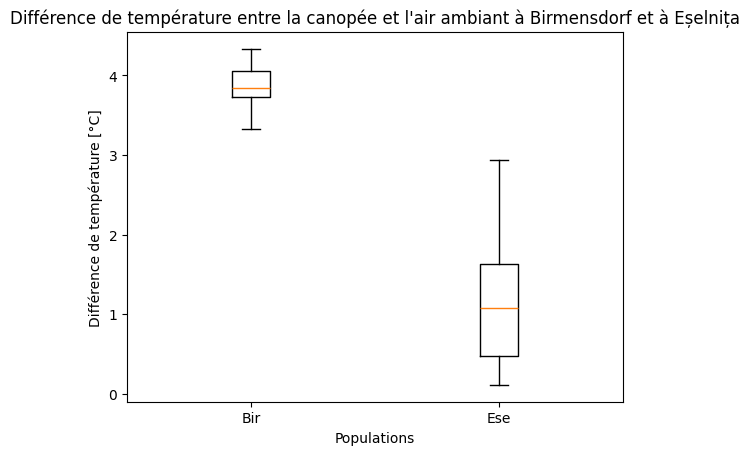

In [7]:
plt.boxplot([temp_T, temp_C], labels=['Bir', 'Ese'])

# Ajouter un titre et des labels d'axe
plt.title("Différence de température entre la canopée et l'air ambiant à Birmensdorf et à Eșelnița")
plt.xlabel('Populations')
plt.ylabel('Différence de température [°C]')

# Afficher le boxplot
plt.show()

In [8]:
# Analyse des données inventées

# HD
# Test de Mann-Whitney
statistic, p_value_mw = stats.mannwhitneyu(HD_T, HD_C)

# Affichage des résultats
print(f'Mann-Whitney U statistic: {statistic}')
print(f'P-value: {p_value_mw}')

# Interprétation des résultats
if p_value_mw < 0.05:
    print("Les populations sont significativement différentes.")
else:
    print("Aucune différence significative entre les populations.")

Mann-Whitney U statistic: 88.0
P-value: 1.0
Aucune différence significative entre les populations.


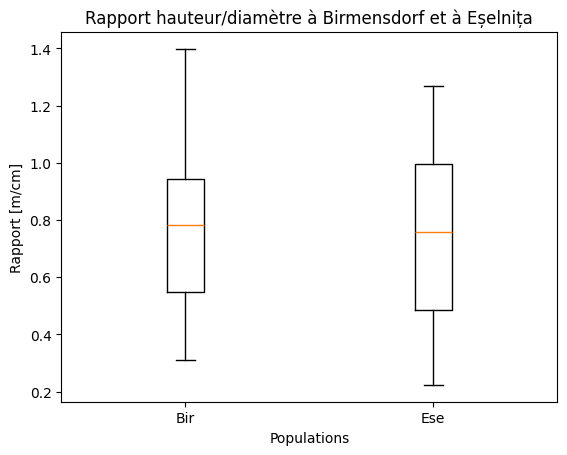

In [9]:
plt.boxplot([HD_T, HD_C], labels=['Bir', 'Ese'])

# Ajouter un titre et des labels d'axe
plt.title('Rapport hauteur/diamètre à Birmensdorf et à Eșelnița')
plt.xlabel('Populations')
plt.ylabel('Rapport [m/cm]')

# Afficher le boxplot
plt.show()

In [10]:
# Analyse des données inventées

# Pigments chl
# Test de Mann-Whitney
statistic, p_value_mw = stats.mannwhitneyu(chl_T, chl_C)

# Affichage des résultats
print(f'Mann-Whitney U statistic: {statistic}')
print(f'P-value: {p_value_mw}')

# Interprétation des résultats
if p_value_mw < 0.05:
    print("Les populations sont significativement différentes.")
else:
    print("Aucune différence significative entre les populations.")

Mann-Whitney U statistic: 125.0
P-value: 0.08710619049449636
Aucune différence significative entre les populations.


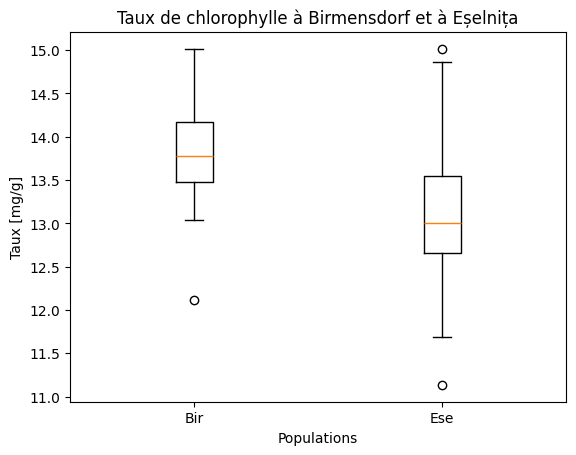

In [11]:
plt.boxplot([chl_T, chl_C], labels=['Bir', 'Ese'])

# Ajouter un titre et des labels d'axe
plt.title('Taux de chlorophylle à Birmensdorf et à Eșelnița')
plt.xlabel('Populations')
plt.ylabel('Taux [mg/g]')

# Afficher le boxplot
plt.show()

In [12]:
# Analyse des données inventées

# Pigments car
# Test de Mann-Whitney
statistic, p_value_mw = stats.mannwhitneyu(car_T, car_C)

# Affichage des résultats
print(f'Mann-Whitney U statistic: {statistic}')
print(f'P-value: {p_value_mw}')

# Interprétation des résultats
if p_value_mw < 0.05:
    print("Les populations sont significativement différentes.")
else:
    print("Aucune différence significative entre les populations.")

Mann-Whitney U statistic: 61.0
P-value: 0.21880820273623874
Aucune différence significative entre les populations.


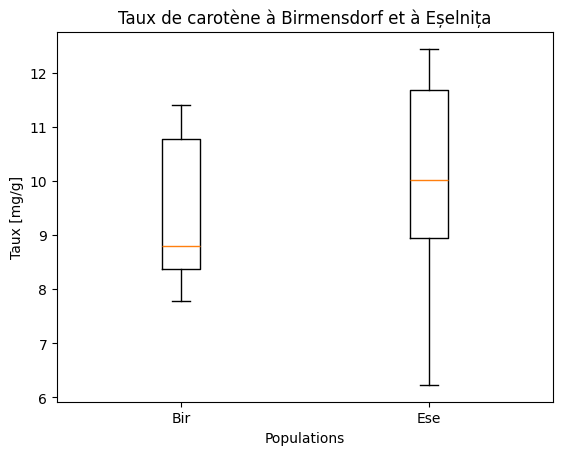

In [13]:
plt.boxplot([car_T, car_C], labels=['Bir', 'Ese'])

# Ajouter un titre et des labels d'axe
plt.title('Taux de carotène à Birmensdorf et à Eșelnița')
plt.xlabel('Populations')
plt.ylabel('Taux [mg/g]')

# Afficher le boxplot
plt.show()

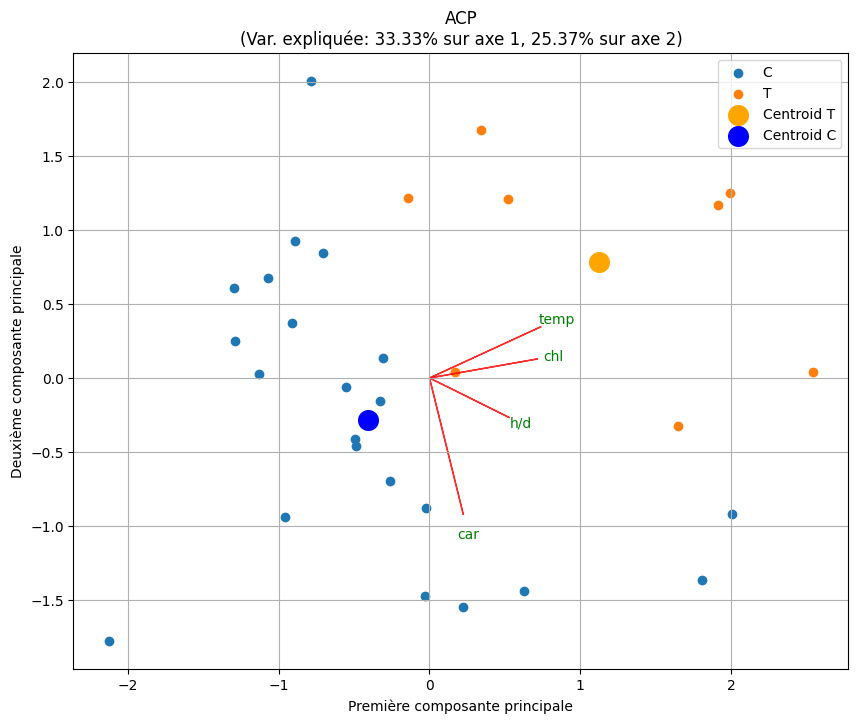

In [14]:
# Concaténer les données en un seul tableau
X = np.vstack([np.column_stack((temp_T, HD_T, chl_T, car_T)), np.column_stack((temp_C, HD_C, chl_C, car_C))])

# Noms des variables
variable_names = ['temp', 'h/d', 'chl', 'car']

# Étiquettes pour les groupes T et C
y = np.array(['T'] * 8 + ['C'] * 22)

# Standardiser les données (centrer et réduire)
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_std = (X - mean) / std_dev

# Appliquer la PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Calculer le pourcentage de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_

# Obtenir les vecteurs propres (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Calculer les centroids
centroid_T = np.mean(X_pca[y == 'T'], axis=0)
centroid_C = np.mean(X_pca[y == 'C'], axis=0)

# Visualiser les résultats avec le pourcentage de variance expliquée, le cercle des corrélations et les centroids
plt.figure(figsize=(10, 8))

# Scatter plot des points
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)

# Cercle des corrélations
for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.8)
    plt.text(x * 1.15, y * 1.15, f'{variable_names[i]}', color='g', ha='center', va='center')

# Centroids
plt.scatter(centroid_T[0], centroid_T[1], marker='o', color='orange', s=200, label='Centroid T')
plt.scatter(centroid_C[0], centroid_C[1], marker='o', color='blue', s=200, label='Centroid C')

plt.title('ACP\n(Var. expliquée: {:.2%} sur axe 1, {:.2%} sur axe 2)'.format(
    explained_variance_ratio[0], explained_variance_ratio[1]))
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend()
plt.grid(True)
plt.show()